In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('Data2.csv',encoding='latin1')

In [3]:
df.head()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Result
0,0.000583,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
1,0.001170,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
2,0.002330,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
3,0.000583,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
4,0.001170,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1


In [19]:
df.shape

(108, 11)

In [4]:
voids=df[df.Result==1]
voids.shape

(43, 11)

In [5]:
No_voids=df[df.Result==0]
No_voids.shape

(65, 11)

In [6]:
df.groupby('Result').mean()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa)
Result,,,,,,,,,,
0,0.002825,19.079077,0.006042,0.009588,15.685538,0.003287,0.002341,2.092308,0.000057,313.846154
1,0.002594,12.398140,0.006127,0.009665,13.368372,0.003303,0.002362,2.081395,0.000055,317.767442


In [7]:
X=df[['Rotation speed(rps)','Axial\npressure(Mpa)','Yield\nstrength(Mpa)']]

In [8]:
Y=df['Result']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [10]:
X_train.head()

,Rotation speed(rps),Axial\npressure(Mpa),Yield\nstrength(Mpa)
51,15.00,26.50,352
89,8.34,13.00,276
29,11.67,13.00,324
20,23.35,7.86,324
75,26.68,13.00,276


In [11]:
Y_train

51     0
89     1
29     1
20     0
75     0
      ..
8      1
56     0
85     1
61     1
104    0
Name: Result, Length: 86, dtype: int64

In [12]:
X_test.head()

,Rotation speed(rps),Axial\npressure(Mpa),Yield\nstrength(Mpa)
27,11.67,13.00,324
79,33.33,13.00,276
44,8.34,26.50,352
99,15.00,23.59,276
26,11.67,13.00,324


In [13]:
Y_test.head()

27    1
79    0
44    1
99    1
26    1
Name: Result, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [15]:
model.score(X_test,Y_test)

0.7727272727272727

In [16]:
Y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[12,  1],
       [ 4,  5]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

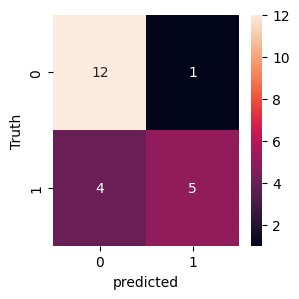

In [17]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')